#### IMport libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



#### Fetch data file

In [2]:
df=pd.read_csv('cs-training.csv')

#### Explore data

In [3]:
df.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [6]:
df.shape

(150000, 11)

In [7]:
df.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [8]:
x=df['MonthlyIncome'].median()
df['MonthlyIncome']=df['MonthlyIncome'].fillna(x)

In [9]:
x=df['NumberOfDependents'].median()
df['NumberOfDependents']=df['NumberOfDependents'].fillna(x)

In [10]:
# To remove outliers
df.drop(df[df['age']<18].index,inplace=True)
df.drop(df[df['MonthlyIncome']>1000000].index,inplace=True)
df.drop(df[df["DebtRatio"]>23000].index,inplace=True)
df.drop(df[df['RevolvingUtilizationOfUnsecuredLines']>15000].index,inplace=True)

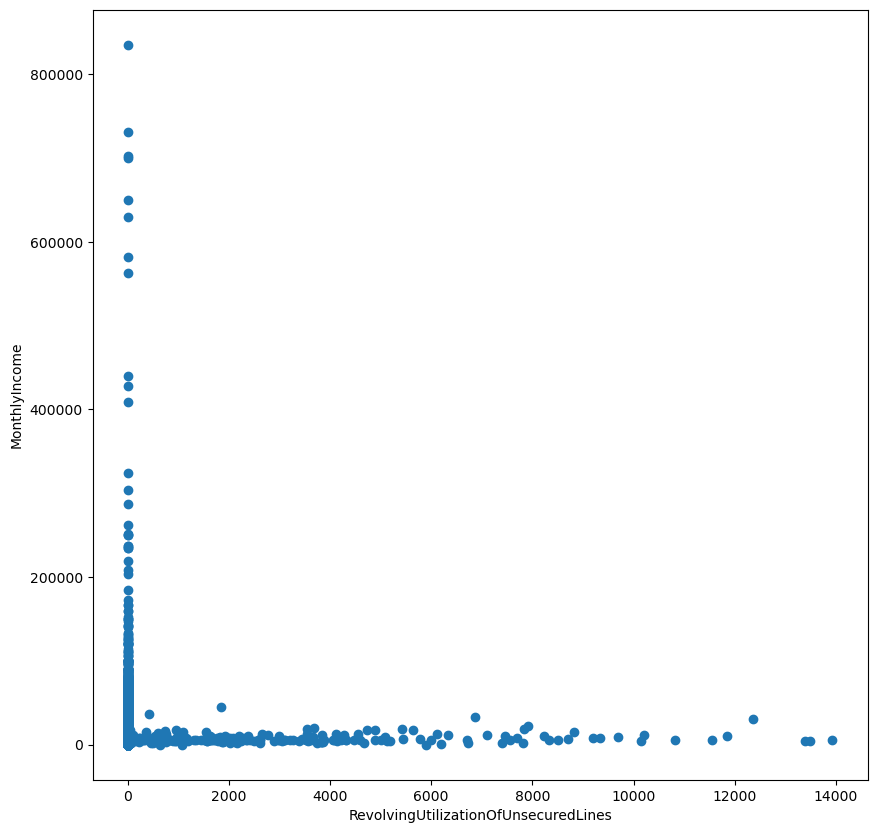

In [11]:
plt.figure(figsize=(10,10))
plt.scatter(x=df['RevolvingUtilizationOfUnsecuredLines'],y=df['MonthlyIncome'])
plt.xlabel('RevolvingUtilizationOfUnsecuredLines')
plt.ylabel('MonthlyIncome')

plt.show()

In [12]:
df1=df.copy()

In [13]:
df1['TotalPastDueDays']=df1['NumberOfTimes90DaysLate']+df1['NumberOfTime30-59DaysPastDueNotWorse']+df1['NumberOfTime60-89DaysPastDueNotWorse']

In [14]:
df1.drop(['NumberOfTimes90DaysLate','NumberOfTime60-89DaysPastDueNotWorse','NumberOfTime30-59DaysPastDueNotWorse'],axis=1,inplace=True)

In [15]:
df1.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,TotalPastDueDays
0,1,0.766127,45,0.802982,9120.0,13,6,2.0,2
1,0,0.957151,40,0.121876,2600.0,4,0,1.0,0
2,0,0.658180,38,0.085113,3042.0,2,0,0.0,2
3,0,0.233810,30,0.036050,3300.0,5,0,0.0,0
4,0,0.907239,49,0.024926,63588.0,7,1,0.0,1


In [16]:
predictor_var=df1[['RevolvingUtilizationOfUnsecuredLines','age','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines','TotalPastDueDays']]
response_var=df1['SeriousDlqin2yrs']

predictor_train,predictor_test,response_train,response_test = train_test_split(predictor_var,response_var,test_size=0.3,random_state=0)

In [17]:
log_regression=LogisticRegression(max_iter=2000)
log_regression.fit(predictor_train,response_train)

LogisticRegression(max_iter=2000)

In [18]:
response_pred=log_regression.predict(predictor_test)

In [19]:
print(metrics.confusion_matrix(response_test,response_pred))

[[42104    42]
 [ 2805    36]]


In [20]:
print(metrics.accuracy_score(response_test,response_pred))

0.9367150510147376
